In [33]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer


In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

In [51]:
def describe(X):
    desc = X.describe(include='all').T
    dt = pd.concat([X.dtypes, desc],  axis=1)
    return dt

describe(X)

,0,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,int64,48842.0,NaN,NaN,NaN,38.643585,13.71051,17.0,28.0,37.0,48.0,90.0
workclass,object,47879,9,Private,33906,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,int64,48842.0,NaN,NaN,NaN,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
education,object,48842,16,HS-grad,15784,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education-num,int64,48842.0,NaN,NaN,NaN,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
marital-status,object,48842,7,Married-civ-spouse,22379,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,object,47876,15,Prof-specialty,6172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,object,48842,6,Husband,19716,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,object,48842,5,White,41762,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,object,48842,2,Male,32650,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
y.value_counts()

income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

In [40]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [55]:
workclass = {' State-gov': 0, ' Self-emp-not-inc': 1, ' Private': 2, ' Federal-gov': 3, ' Local-gov': 4, ' ?': 5, ' Self-emp-inc': 6, ' Without-pay': 7}
education = {' Bachelors': 0, ' HS-grad': 1, ' 11th': 2, ' Masters': 3, ' 9th': 4, ' Some-college': 5, ' Assoc-acdm': 6, ' Assoc-voc': 7, ' 7th-8th': 8, ' Doctorate': 9, ' Prof-school': 10, ' 5th-6th': 11, ' 10th': 12, ' 1st-4th': 13, ' Preschool': 14, ' 12th': 15}
marital_status = {' Never-married': 0, ' Married-civ-spouse': 1, ' Divorced': 2, ' Married-spouse-absent': 3, ' Separated': 4, ' Married-AF-spouse': 5, ' Widowed': 6}
occupation = {' Adm-clerical': 0, ' Exec-managerial': 1, ' Handlers-cleaners': 2, ' Prof-specialty': 3, ' Other-service': 4, ' Sales': 5, ' Craft-repair': 6, ' Transport-moving': 7, ' Farming-fishing': 8, ' Machine-op-inspct': 9, ' Tech-support': 10, ' ?': 11, ' Protective-serv': 12, ' Armed-Forces': 13, ' Priv-house-serv': 14}
relationship = {' Not-in-family': 0, ' Husband': 1, ' Wife': 2, ' Own-child': 3, ' Unmarried': 4, ' Other-relative': 5}
race = {' White': 0, ' Black': 1, ' Asian-Pac-Islander': 2, ' Amer-Indian-Eskimo': 3, ' Other': 4}
sex = {' Male': 0, ' Female': 1}
native_country = {' United-States': 0, ' Cuba': 1, ' Jamaica': 2, ' India': 3, ' ?': 4, ' Mexico': 5, ' South': 6, ' Puerto-Rico': 7, ' Honduras': 8, ' England': 9, ' Canada': 10, ' Germany': 11, ' Iran': 12, ' Philippines': 13, ' Italy': 14, ' Poland': 15, ' Columbia': 16, ' Cambodia': 17, ' Thailand': 18, ' Ecuador': 19, ' Laos': 20, ' Taiwan': 21, ' Haiti': 22, ' Portugal': 23, ' Dominican-Republic': 24, ' El-Salvador': 25, ' France': 26, ' Guatemala': 27, ' China': 28, ' Japan': 29, ' Yugoslavia': 30, ' Peru': 31, ' Outlying-US(Guam-USVI-etc)': 32, ' Scotland': 33, ' Trinadad&Tobago': 34, ' Greece': 35, ' Nicaragua': 36, ' Vietnam': 37, ' Hong': 38, ' Ireland': 39}
#Pay{' <=50K': 0, ' >50K': 1}


def labelEnc(feat:str)->list:
    """
      This function converts the categorical variables in a feature to
      numerical by using the unique values in the column
    """
    uniques = dict(zip(list(X[feat].unique()), list(range(len(X[feat].unique())+1))))
    print(uniques)
    newlist = list(map(lambda x: uniques[x],X[feat] ))
    return newlist

for i in X.columns:
    if X[i].dtype =='object':
        X[i] = labelEnc(i)

{'State-gov': 0, 'Self-emp-not-inc': 1, 'Private': 2, 'Federal-gov': 3, 'Local-gov': 4, '?': 5, 'Self-emp-inc': 6, 'Without-pay': 7, 'Never-worked': 8, nan: 9}
{'Bachelors': 0, 'HS-grad': 1, '11th': 2, 'Masters': 3, '9th': 4, 'Some-college': 5, 'Assoc-acdm': 6, 'Assoc-voc': 7, '7th-8th': 8, 'Doctorate': 9, 'Prof-school': 10, '5th-6th': 11, '10th': 12, '1st-4th': 13, 'Preschool': 14, '12th': 15}
{'Never-married': 0, 'Married-civ-spouse': 1, 'Divorced': 2, 'Married-spouse-absent': 3, 'Separated': 4, 'Married-AF-spouse': 5, 'Widowed': 6}
{'Adm-clerical': 0, 'Exec-managerial': 1, 'Handlers-cleaners': 2, 'Prof-specialty': 3, 'Other-service': 4, 'Sales': 5, 'Craft-repair': 6, 'Transport-moving': 7, 'Farming-fishing': 8, 'Machine-op-inspct': 9, 'Tech-support': 10, '?': 11, 'Protective-serv': 12, 'Armed-Forces': 13, 'Priv-house-serv': 14, nan: 15}
{'Not-in-family': 0, 'Husband': 1, 'Wife': 2, 'Own-child': 3, 'Unmarried': 4, 'Other-relative': 5}
{'White': 0, 'Black': 1, 'Asian-Pac-Islander': 2,

C:\Users\EdwinVivekN\AppData\Local\Temp\ipykernel_10364\2820755780.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = labelEnc(i)


{'Male': 0, 'Female': 1}
{'United-States': 0, 'Cuba': 1, 'Jamaica': 2, 'India': 3, '?': 4, 'Mexico': 5, 'South': 6, 'Puerto-Rico': 7, 'Honduras': 8, 'England': 9, 'Canada': 10, 'Germany': 11, 'Iran': 12, 'Philippines': 13, 'Italy': 14, 'Poland': 15, 'Columbia': 16, 'Cambodia': 17, 'Thailand': 18, 'Ecuador': 19, 'Laos': 20, 'Taiwan': 21, 'Haiti': 22, 'Portugal': 23, 'Dominican-Republic': 24, 'El-Salvador': 25, 'France': 26, 'Guatemala': 27, 'China': 28, 'Japan': 29, 'Yugoslavia': 30, 'Peru': 31, 'Outlying-US(Guam-USVI-etc)': 32, 'Scotland': 33, 'Trinadad&Tobago': 34, 'Greece': 35, 'Nicaragua': 36, 'Vietnam': 37, 'Hong': 38, 'Ireland': 39, 'Hungary': 40, 'Holand-Netherlands': 41, nan: 42}


In [58]:
describe(X)

,0,count,mean,std,min,25%,50%,75%,max
age,int64,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
workclass,int64,48842.0,2.390525,1.500934,0.0,2.0,2.0,2.0,9.0
fnlwgt,int64,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
education,int64,48842.0,3.411961,3.449311,0.0,1.0,2.0,5.0,15.0
education-num,int64,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
marital-status,int64,48842.0,1.083944,1.257478,0.0,0.0,1.0,1.0,6.0
occupation,int64,48842.0,4.767106,3.586902,0.0,2.0,4.0,7.0,15.0
relationship,int64,48842.0,1.538655,1.440077,0.0,0.0,1.0,3.0,5.0
race,int64,48842.0,0.220241,0.625644,0.0,0.0,0.0,0.0,4.0
sex,int64,48842.0,0.331518,0.470764,0.0,0.0,0.0,1.0,1.0


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [117]:
print(y_train.value_counts())
y_train_mapped = y_train["income"].apply(lambda x:1 if x in {"<=50K", "<=50K."} else 0)
y_train_mapped.value_counts()

income
<=50K     16473
<=50K.     8355
>50K       5293
>50K.      2603
Name: count, dtype: int64


income
1    24828
0     7896
Name: count, dtype: int64

## K-Means

In [66]:
scaler = StandardScaler()
X_scaled_df= scaler.fit_transform(X_train)
X_scaled_df

array([[ 1.48300634, -0.26050463,  1.12530528, ..., -0.21599666,
         0.76603493, -0.25273863],
       [-0.48637957, -0.26050463,  0.03512357, ..., -0.21599666,
         0.36631482, -0.25273863],
       [-1.43460242, -0.26050463, -0.60659568, ..., -0.21599666,
        -0.03340528, -0.25273863],
       ...,
       [ 0.1700824 , -0.92754324,  1.47963481, ..., -0.21599666,
         1.56547514, -0.25273863],
       [ 0.60772371, -0.92754324, -0.80758656, ..., -0.21599666,
        -0.03340528, -0.25273863],
       [-0.99696111, -0.26050463, -0.02240581, ..., -0.21599666,
         0.60614688, -0.25273863]])

In [67]:
kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
kmeans.fit(X_scaled_df)

KMeans(n_clusters=3, random_state=0)

In [98]:
y_train_pred = kmeans.predict(X_scaled_df)
y_train_pred is kmeans.labels_

False

In [177]:
feature_names = adult.data.headers
df_centers = pd.DataFrame(kmeans.cluster_centers_, columns=feature_names[:-1], index=["Cluster " + str(i) for i in range(0,3)])
df_centers

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
Cluster 0,0.251018,2.288067,-0.025865,0.181168,-0.031136,0.059725,1.230045,-0.012803,-0.019708,-0.081911,0.576193,0.054615,-0.130739,-0.012772
Cluster 1,-0.125329,-0.213972,-0.044517,-0.022497,0.000667,0.256674,-0.396209,0.432067,0.101760,1.395236,-0.095609,-0.063101,-0.318128,0.003311
Cluster 2,0.018640,-0.305158,0.027466,-0.021320,0.005301,-0.142162,-0.020173,-0.218765,-0.048498,-0.699086,-0.055496,0.022391,0.186476,0.000620


In [179]:
actual_data = scaler.inverse_transform(df_centers)
pd.DataFrame(actual_data, columns=feature_names[:-1])


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,42.109620,5.820725,186561.849558,4.047673,9.996289,1.160719,9.184413,1.526977,0.211818,0.293177,5411.124179,108.884670,38.782472,1.403369
1,36.949955,2.069760,184603.541603,3.344151,10.078051,1.408250,3.352341,2.166414,0.288747,0.988677,378.605298,61.519867,36.438479,1.497422
2,38.923745,1.933057,192161.058251,3.348215,10.089964,0.906984,4.700879,1.230936,0.193585,0.002587,679.090378,95.918883,42.750440,1.481686


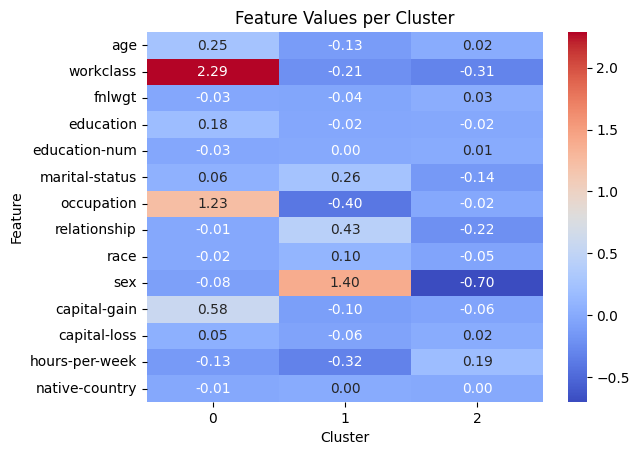

In [99]:
# Cluster Centroid Heatmap (Feature Importance per Cluster)
sns.heatmap(df_centers.T, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Feature Values per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Feature")
plt.show()

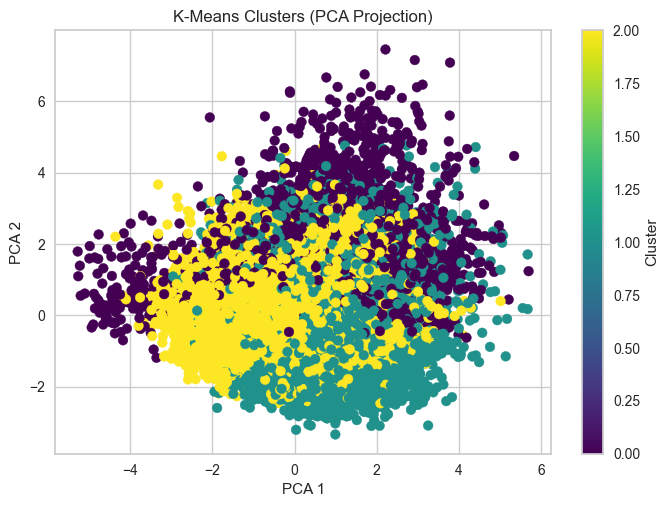

In [144]:
# 2D Scatter Plot using PCA
# Reduce to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_df)  # assuming X_scaled is your standardized data

# Plot with cluster labels
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('K-Means Clusters (PCA Projection)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()

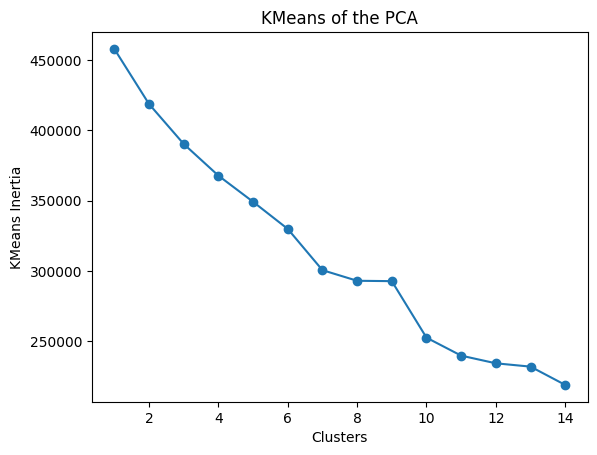

In [120]:
#elbow method - determine optimal K
wcss = []
for i in range(1,15):
    KM = KMeans(n_clusters=i, init='k-means++', n_init='auto')
    KM.fit(X_scaled_df)
    wcss.append(KM.inertia_)

plt.title('KMeans of the PCA')
plt.plot(range(1,15), wcss, marker='o')
plt.xlabel('Clusters')
plt.ylabel('KMeans Inertia')
plt.show()

In [124]:
#Silhouette score
from sklearn.metrics import silhouette_score

K = range(2, 12)
fits = []
score = []

for k in K:
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(X_scaled_df)
    fits.append(model)
    # Append the silhouette score to scores
    score.append(silhouette_score(X_scaled_df, model.labels_, metric='euclidean'))

<Axes: >

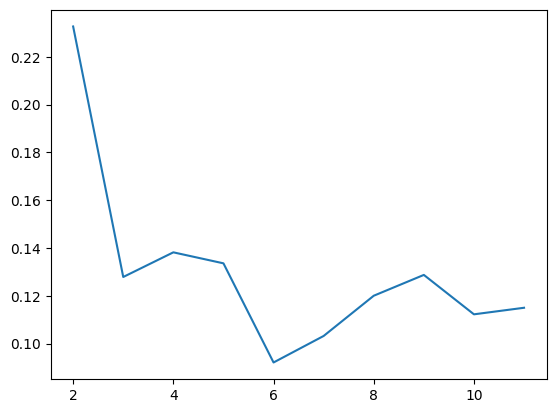

In [125]:
sns.lineplot(x = K, y = score)

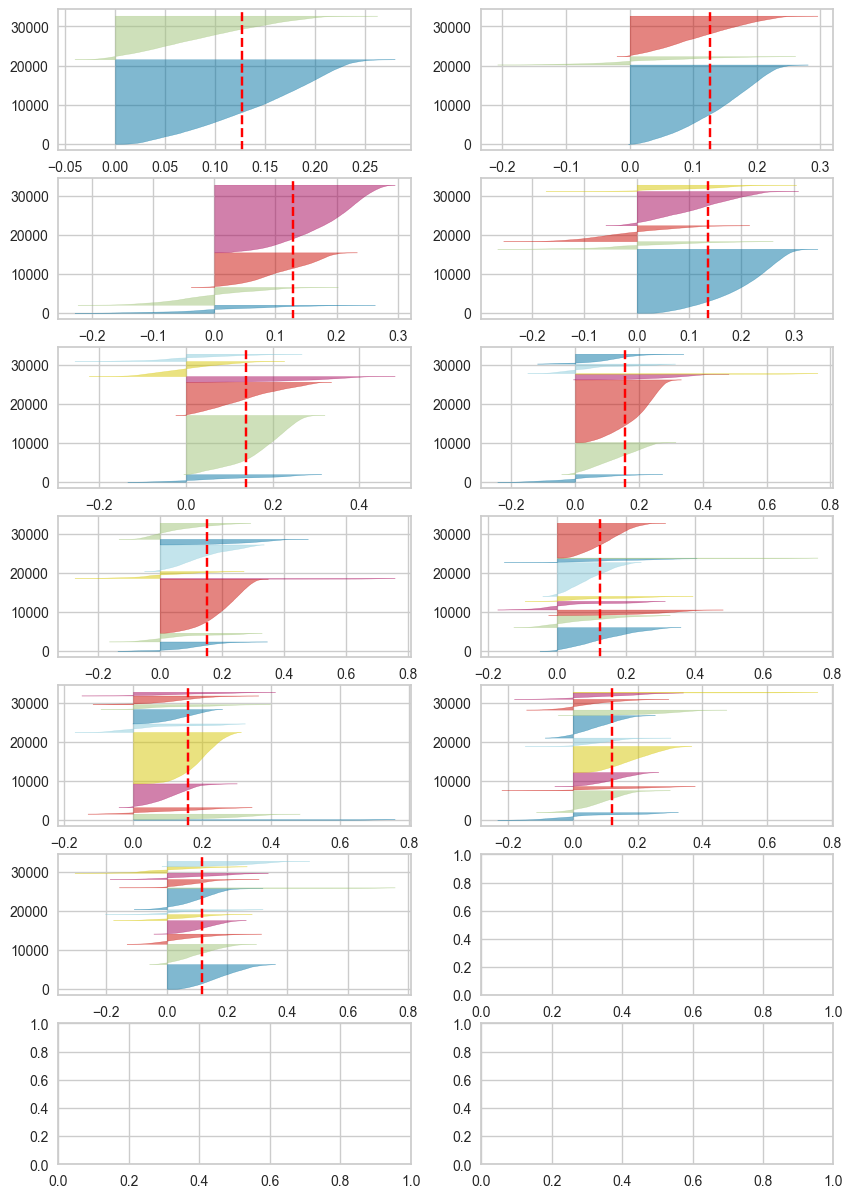

In [128]:
fig, ax = plt.subplots(7, 2, figsize=(10,15))
for i in range(2,13):
    '''
    Create KMeans instances for different number of clusters
    '''

    km = KMeans(n_clusters=i, init='random', n_init='auto')
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer_sil = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer_sil.fit(X_scaled_df)

In [139]:
km_final = KMeans(n_clusters=2, init='k-means++', n_init='auto')
km_final.fit(X_scaled_df)
km_final.labels_

array([1, 1, 0, ..., 1, 1, 1])

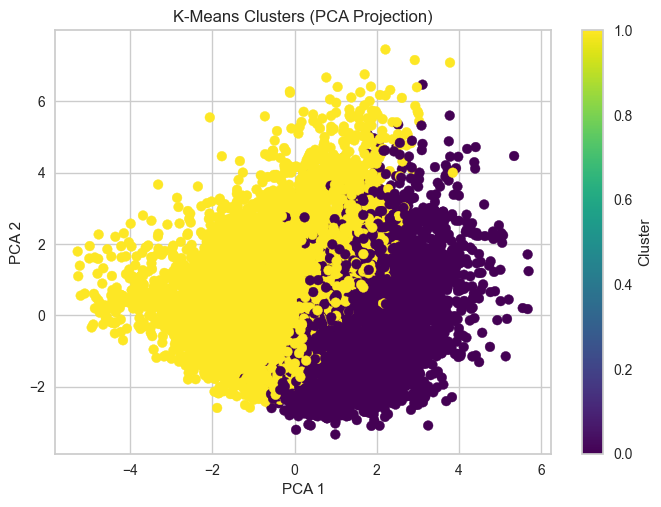

In [152]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=km_final.labels_, cmap='viridis')
#plt.scatter(km_final.cluster_centers_[:, 0], km_final.cluster_centers_[:, 1], s = 100, c = 'red', label = 'Centroids')
plt.title('K-Means Clusters (PCA Projection)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()

In [181]:
from collections import Counter
Counter(km_final.labels_)

Counter({1: 21592, 0: 11132})

## K-Means example by hand

In [39]:
data = {
    "Feature1": [1, 2, 3, 0, 4],
    "Feature2": [2, 1, 5, 2, 1],
    "Feature3": [1, 0, 2, 4, 1],
    "Feature4": [0, 4, 1, 3, 0],
    "Feature5": [3, 2, 0, 1, 4]
}

# Create DataFrame with point labels
df = pd.DataFrame(data, index=["A", "B", "C", "D", "E"])
df

,Feature1,Feature2,Feature3,Feature4,Feature5
A,1,2,1,0,3
B,2,1,0,4,2
C,3,5,2,1,0
D,0,2,4,3,1
E,4,1,1,0,4


In [40]:
#passing 3 rows as initial centroids instead of ramdom pick
ks = KMeans(n_clusters=3, random_state=42, init=[[1, 2, 1, 0, 3], [2, 1, 0, 4, 2], [3, 5, 2, 1, 0]])
ks.fit_predict(df)

array([0, 1, 2, 0, 0])

In [41]:
ks.cluster_centers_

array([[1.66666667, 1.66666667, 2.        , 1.        , 2.66666667],
       [2.        , 1.        , 0.        , 4.        , 2.        ],
       [3.        , 5.        , 2.        , 1.        , 0.        ]])

In [43]:
ks.transform(df)

array([[1.63299316, 4.47213595, 4.89897949],
       [3.74165739, 0.        , 5.83095189],
       [4.47213595, 5.83095189, 0.        ],
       [3.6968455 , 4.79583152, 5.19615242],
       [3.10912635, 5.        , 5.91607978]])

In [42]:
#For index B
c0 = np.sqrt((2 - 1.66)**2 + (1 - 1.66)**2 + (0 - 2)**2 + (4 - 1)**2 + (2 - 2.66)**2)
c1 = np.sqrt((2 - 2)**2 + (1 - 1)**2 + (0 - 0)**2 + (4 - 4)**2 + (2 - 2)**2)
c2 = np.sqrt((2 - 3)**2 + (1 - 5)**2 + (0 - 2)**2 + (4 - 1)**2 + (2 - 0)**2)
print(f'Distance to c0: {c0}, c1: { c1}, c2: {c2}')
#C1 is smaller so 1 is the cluster

Distance to c0: 3.73989304659906, c1: 0.0, c2: 5.830951894845301


In [ ]:
#Recalculate centroids
#C0 gets A,D,E, New C0 = Mean of A, D, E
#C1 gets B, New C1 = Mean B
#C2 gets C, New C2 = Mean C



## DBSCAN

In [46]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

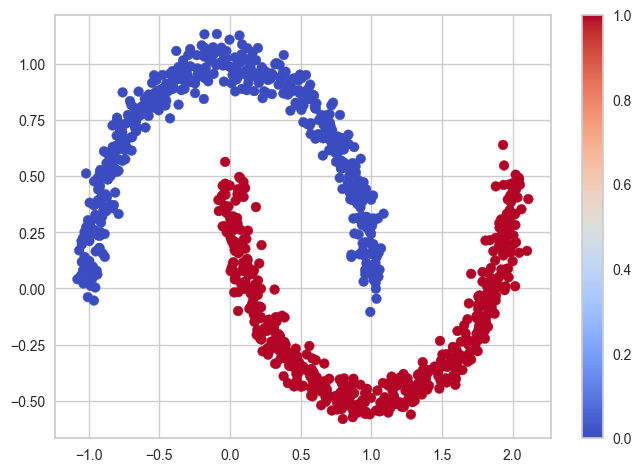

In [58]:
plt.scatter(X[:,0],X[:,1], c=y,cmap='coolwarm')
plt.colorbar()

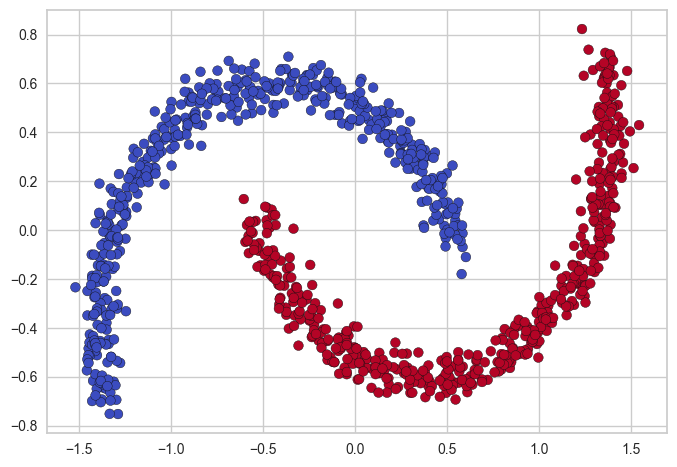

In [64]:
from sklearn.decomposition import PCA
X_pca = PCA(n_components=2).fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', edgecolor='k')


In [68]:
labels = dbscan.labels_
from collections import Counter
Counter(labels)

Counter({1: 227,
         0: 179,
         6: 175,
         2: 152,
         3: 78,
         -1: 70,
         4: 56,
         5: 23,
         7: 21,
         9: 10,
         8: 9})

In [69]:
n_noise_ = list(labels).count(-1)
n_noise_

70

In [75]:
# Core samples mask
core_mask = np.zeros_like(labels, dtype=bool)
core_mask[dbscan.core_sample_indices_] = True
Counter(core_mask)

Counter({True: 797, False: 203})

In [31]:
unique_labels = set(labels)
unique_labels

{-1, 0, 1, 2, 3, 4, 5, 6, 7}

C:\Users\EdwinVivekN\AppData\Local\Temp\ipykernel_26664\2255854489.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_labels))


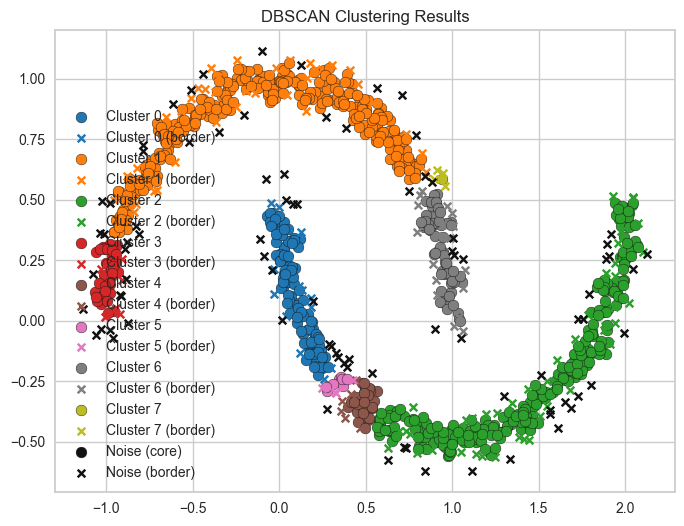

In [37]:

# Create colors (1 for each cluster, plus black for noise)
colors = plt.cm.get_cmap('tab10', len(unique_labels))

# Plotting
plt.figure(figsize=(8, 6))
for label in unique_labels:
    color = 'k' if label == -1 else colors(label)

    # Mask for this cluster
    label_mask = (labels == label)

    # Plot core points
    plt.scatter(
        X[label_mask & core_mask, 0],
        X[label_mask & core_mask, 1],
        c=[color],
        marker='o',
        edgecolor='k',
        s=60,
        label=f'Cluster {label}' if label != -1 else 'Noise (core)'
    )

    # Plot border points
    plt.scatter(
        X[label_mask & ~core_mask, 0],
        X[label_mask & ~core_mask, 1],
        c=[color],
        marker='x',
        s=30,
        label=f'Cluster {label} (border)' if label != -1 else 'Noise (border)'
    )

plt.title("DBSCAN Clustering Results")
plt.legend(loc='best')
plt.grid(True)
plt.show()